In [2]:
import numpy as np
import pandas as pd

##Imports

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm


#time
import time

#Add plot
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') # whitegrid nice with 3d

# Linear regression

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

Assume the **data generating process** is given by:

In [3]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

**The data you have access to is:**

In [4]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

**Question 1:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}$$

In [5]:
#Q1 Answer
#coeffs = linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
Y=np.array(y)
X1=np.array(x1)
X2=np.array(x2)
print(y.shape)
print(X1.shape)
print(X2.shape)
X0=np.ones(shape=y.shape)
print(X0.shape)
X=np.column_stack((X0,X1))
X=np.column_stack((X,X2))
print(X.shape)
print(X)

(10000,)
(10000,)
(10000,)
(10000,)
(10000, 3)
[[ 1.         -1.76884571 -0.18279442]
 [ 1.          0.07555227  0.78062368]
 [ 1.         -1.1306297  -1.01220533]
 ...
 [ 1.          0.0370484  -1.44286811]
 [ 1.          1.70892684 -0.10668645]
 [ 1.          2.06128052  0.55908184]]


In [6]:
coeffs = linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
print(coeffs)

[0.0956821  0.29294299 0.50332771]


In [7]:
# we end up with the results:
B_0_hat=coeffs[0]
print(B_0_hat)
B_1_hat=coeffs[1]
print(B_1_hat)
B_2_hat=coeffs[2]
print(B_2_hat)

0.09568210492389777
0.2929429877107508
0.5033277126888069


**Question 2:** Construct a 3D plot, where the data is plotted as scattered points, and the prediction of the model is given by the plane

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i}$$

In [8]:
#Constructiong the meshgrid for our predicted model
xx, yy = np.meshgrid(np.arange(-5,5,0.5),np.arange(-5,5,0.5))
y_pred_grid = B_0_hat+B_1_hat*xx + B_2_hat*yy

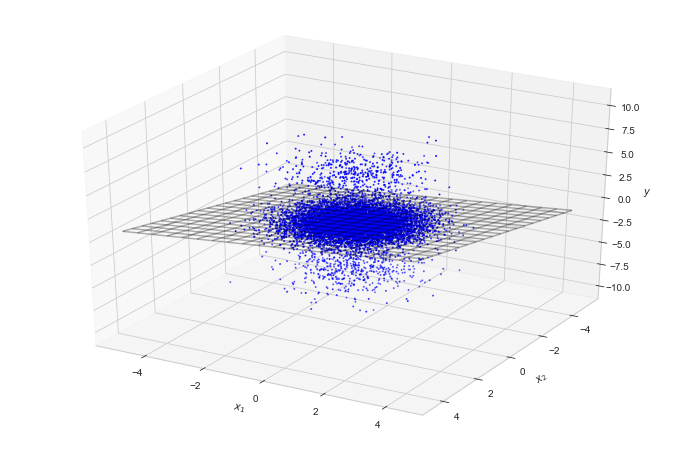

In [9]:
fig = plt.figure(figsize=(12,8)) # create the figure
ax = fig.add_subplot(111, projection='3d') # create a 3d axis in the figure 
ax.scatter(X1,X2,Y, c='b', marker='o',s=1)

ax.plot_wireframe(xx, yy, y_pred_grid,rstride=1,cstride=1,
                alpha = 0.3, color='Black')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

# c. invert yaxis
ax.invert_yaxis()


**Question 3:** Esimtate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using a **numerical solver** to solve the ordinary least square problem, shown below, directly. Compare your results with the matrix algebra results.

$$ \min_{\mathbf{\beta}} \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) )^2 $$

In [10]:

Numerical_solver_result=np.linalg.lstsq(X,Y)[0]
print(Numerical_solver_result)

[0.0956821  0.29294299 0.50332771]


In [11]:
#np.random.seed(2020)
#x1,x2,y = DGP(50)
#Y=np.array(y)
#X1=np.array(x1)
#X2=np.array(x2)
#X0=np.ones(shape=y.shape)
#X=np.column_stack((X0,X1))
#X=np.column_stack((X,X2))
#Numerical_solver_result=np.linalg.lstsq(X,Y)[0]
#print(Numerical_solver_result)

In [12]:
t0 = time.time()
def OLS(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.sqrt(Y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.3,0.5]

# We use the solver to maximize tax revenu given the three parameters
OLS_optimizer = optimize.minimize(OLS, Guess, method='SLSQP')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')

print(f'{"SLSQP":12s}: {time.time()-t0:.5f} secs')

NameError: name 'LAD_optimizer' is not defined

In [13]:
print(coeffs-Numerical_solver_result)

[-2.77555756e-17 -5.55111512e-17  2.22044605e-16]


**Question 4:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **least absolute deviations (LAD)** using a numerical solver to solve the following problem directly: 

$$  \min_{\beta} \sum^N_{i=1} |y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) | $$

where $|z|$ is the absolute value of $z$.

In [14]:
t0 = time.time()
def OLS(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.sqrt(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.3,0.5]

# We use the solver to maximize tax revenu given the three parameters
OLS_optimizer = optimize.minimize(OLS, Guess, method='SLSQP')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')

print(f'{"SLSQP":12s}: {time.time()-t0:.5f} secs')

NameError: name 'LAD_optimizer' is not defined

In [15]:
t0 = time.time()
def LAD(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.abs(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.3,0.5]

# We use the solver to maximize tax revenu given the three parameters
LAD_optimizer = optimize.minimize(LAD, Guess, method='SLSQP')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')

print(f'{"SLSQP":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.092
Optimal Beta_1 is 0.307
Optimal Beta_2 is 0.512
SLSQP       : 0.06307 secs


In [16]:
t0 = time.time()
def LAD(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.abs(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.3,0.5]

# We use the solver to maximize tax revenu given the three parameters
LAD_optimizer = optimize.minimize(LAD, Guess, method='Nelder-Mead')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')
print(f'{"Nelder-Mead":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.092
Optimal Beta_1 is 0.307
Optimal Beta_2 is 0.512
Nelder-Mead : 0.05008 secs


In [17]:
t0 = time.time()
def LAD(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.abs(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.3,0.5]

# We use the solver to maximize tax revenu given the three parameters
LAD_optimizer = optimize.minimize(LAD, Guess, method='BFGS')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')
print(f'{"Nelder-Mead":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.092
Optimal Beta_1 is 0.307
Optimal Beta_2 is 0.512
Nelder-Mead : 0.29832 secs


In [18]:
t0 = time.time()
def LAD(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.abs(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.3,0.5]

# We use the solver to maximize tax revenu given the three parameters
LAD_optimizer = optimize.minimize(LAD, Guess, method='L-BFGS-B')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')
print(f'{"Nelder-Mead":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.092
Optimal Beta_1 is 0.308
Optimal Beta_2 is 0.512
Nelder-Mead : 0.07999 secs


**Question 5:** Set $N = 50$. Repeat the estimation using the **OLS** and **LAD** methods $K=5000$ times, drawing a new random sample from the data generating process each time. Compare the estimates from each method using histograms. Which method do you prefer? Explain your choice.

In [37]:
#Now we need to simulate the model using OLS and LAD for:
N=50
K=50
Beta_0_OLS = np.empty((K,1))
Beta_1_OLS = np.empty((K,1))
Beta_2_OLS = np.empty((K,1))

In [38]:
for i in range(0,K):
    np.random.seed(i)
    x1,x2,y = DGP(N)
    Y=np.array(y)
    X1=np.array(x1)
    X2=np.array(x2)
    X0=np.ones(shape=y.shape)
    X=np.column_stack((X0,X1))
    X=np.column_stack((X,X2))
    # For OLS:
    def OLS(x):
        Beta_0 = x[0]
        Beta_1 = x[1]
        Beta_2 = x[2]
        return np.sum(np.sqrt(Y-(Beta_0+Beta_1*X1+Beta_2*X2)))

    # We set the bounds and start with the given parameter values
        Guess = [0.1,0.1,0.1]

    # We use the solver to maximize tax revenu given the three parameters
        OLS_optimizer = optimize.minimize(OLS, Guess, method='SLSQP')

    # We find the optimal parameters
        Beta_0_opt=LAD_optimizer.x[0]
        Beta_1_opt=LAD_optimizer.x[1]
        Beta_2_opt=LAD_optimizer.x[2]

    #
        Beta_0_OLS[i] = Beta_0_opt
        Beta_1_OLS[i] = Beta_1_opt
        Beta_2_OLS[i] = Beta_2_opt



In [40]:
print(Beta_0_OLS)
print(Beta_1_OLS)
print(Beta_2_OLS)
print(Beta_0_OLS.shape)

[[0.20335947]
 [0.77864253]
 [0.02271957]
 [0.08041351]
 [0.69205309]
 [0.28852089]
 [0.4351393 ]
 [0.341735  ]
 [0.00362178]
 [0.11147388]
 [0.43060423]
 [0.10199439]
 [0.16099921]
 [0.27053866]
 [0.13871183]
 [0.39358499]
 [0.11396196]
 [0.50690099]
 [0.00846632]
 [0.6385341 ]
 [0.07123384]
 [0.35576668]
 [0.06480475]
 [0.13866204]
 [0.32435979]
 [0.33157187]
 [0.63564617]
 [0.21044788]
 [0.23524937]
 [0.29818966]
 [0.39607457]
 [0.37521742]
 [0.19595859]
 [0.18379885]
 [0.74996107]
 [0.49924265]
 [0.69233917]
 [0.15305729]
 [0.15720343]
 [0.54481249]
 [0.16355693]
 [0.64541136]
 [0.20106025]
 [0.31941728]
 [0.12603397]
 [0.40430606]
 [0.31063825]
 [0.01422625]
 [0.36990506]
 [0.70643025]]
[[3.5e-323]
 [2.5e-323]
 [1.5e-323]
 [1.5e-323]
 [4.4e-323]
 [3.0e-323]
 [0.0e+000]
 [3.0e-323]
 [1.5e-323]
 [2.5e-323]
 [2.0e-323]
 [3.0e-323]
 [2.0e-323]
 [2.0e-323]
 [1.5e-323]
 [9.9e-324]
 [1.5e-323]
 [4.0e-323]
 [2.0e-323]
 [2.5e-323]
 [4.0e-323]
 [4.9e-324]
 [3.0e-323]
 [2.5e-323]
 [9.9e-324]

(array([7., 8., 8., 4., 7., 5., 3., 0., 5., 3.]),
 array([0.00362178, 0.08112385, 0.15862593, 0.236128  , 0.31363008,
        0.39113215, 0.46863423, 0.5461363 , 0.62363838, 0.70114045,
        0.77864253]),
 <a list of 10 Patch objects>)

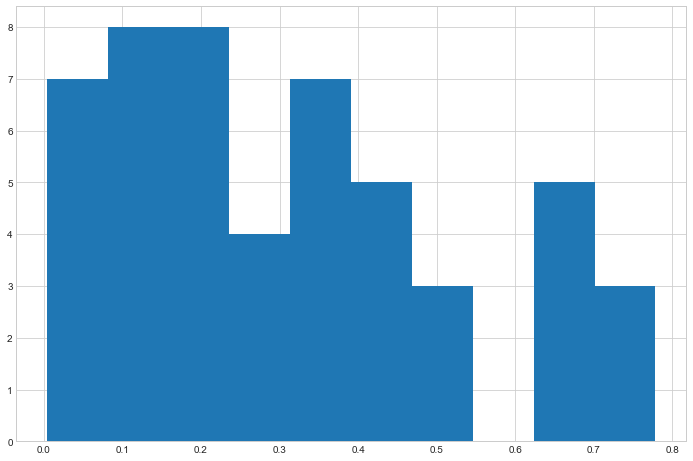

In [41]:
fig = plt.figure(figsize=(12,8)) # create the figure
ax = fig.add_subplot(111) # create a 3d axis in the figure 
ax.hist(Beta_0_OLS)

In [23]:
N=50
for i in range(0,K):
    np.random.seed(i)
    x1,x2,y = DGP(N)
    Y=np.array(y)
    X1=np.array(x1)
    X2=np.array(x2)
    X0=np.ones(shape=y.shape)
    X=np.column_stack((X0,X1))
    X=np.column_stack((X,X2))
    print(X[1,:])
    # For OLS:
    Numerical_solver_result=np.linalg.lstsq(X,Y)[0]

    # We find the optimal parameters
    Beta_0_opt=Numerical_solver_result[0]
    Beta_1_opt=Numerical_solver_result[1]
    Beta_2_opt=Numerical_solver_result[2]

    #
    Beta_0_OLS[i] = Beta_0_opt
    Beta_1_OLS[i] = Beta_1_opt
    Beta_2_OLS[i] = Beta_2_opt

[1.         0.40015721 0.3869025 ]
[ 1.         -0.61175641 -0.35224985]
[ 1.         -0.05626683 -0.38109252]
[1.         0.43650985 0.85279784]
[ 1.          0.49995133 -1.84087587]
[ 1.         -0.33087015  0.22125412]
[1.         0.72900392 1.07368134]
[ 1.         -0.46593737  0.23730185]
[ 1.          1.09128273 -1.77911304]
[ 1.         -0.28954407 -0.50340538]
[1.         0.71527897 0.2890942 ]
[ 1.         -0.286073    0.69556726]
[ 1.         -0.68142588  0.86761195]
[ 1.          0.75376638 -0.33267578]
[ 1.          0.07918602 -1.52181288]
[1.         0.33928471 0.21968803]
[ 1.         -1.52847346  2.0104348 ]
[ 1.         -1.85462808 -0.98339611]
[1.         2.19020236 0.08612803]
[ 1.         -0.34046501 -0.05249119]
[ 1.          0.19586502 -2.70436525]
[ 1.         -0.11119605  0.74730849]
[ 1.         -1.46335065  0.53690999]
[1.         0.02581308 0.19014136]
[ 1.         -0.77003345  1.06132976]
[1.        1.0268903 1.6624344]
[ 1.         -1.9412364  -0.35527099]
[

In [24]:
print(Beta_0_OLS)
print(Beta_1_OLS)
print(Beta_2_OLS)
print(Beta_0_OLS.shape)

[[ 0.32311319]
 [ 0.020191  ]
 [-0.24932515]
 [-0.19224655]
 [ 0.55641045]
 [ 0.13062049]
 [-0.55699302]
 [ 0.1766068 ]
 [-0.18247042]
 [ 0.03052674]
 [-0.08676678]
 [ 0.12576738]
 [-0.02769555]
 [-0.13828678]
 [-0.21484605]
 [-0.27830616]
 [-0.21035345]
 [ 0.36495796]
 [-0.06168473]
 [-0.01733013]
 [ 0.42164446]
 [-0.41081393]
 [ 0.14561747]
 [ 0.090183  ]
 [-0.33439728]
 [-0.06142767]
 [-0.55467824]
 [ 0.36853533]
 [ 0.28472068]
 [ 0.0695027 ]
 [ 0.13504573]
 [ 0.05410559]
 [ 0.13884869]
 [-0.34322082]
 [ 0.31179003]
 [ 0.35189951]
 [ 0.18542857]
 [ 0.21542629]
 [ 0.45101237]
 [-0.04475275]
 [-0.34732362]
 [-0.18189312]
 [-0.05939786]
 [-0.60697825]
 [ 0.21372173]
 [ 0.35591332]
 [-0.08833362]
 [ 0.55547189]
 [ 0.14166492]
 [ 0.2329455 ]]
[[ 0.20335947]
 [ 0.77864253]
 [-0.02271957]
 [ 0.08041351]
 [ 0.69205309]
 [ 0.28852089]
 [ 0.4351393 ]
 [ 0.341735  ]
 [-0.00362178]
 [-0.11147388]
 [ 0.43060423]
 [ 0.10199439]
 [ 0.16099921]
 [ 0.27053866]
 [ 0.13871183]
 [ 0.39358499]
 [ 0.1139

(array([3., 1., 4., 6., 8., 6., 8., 6., 5., 3.]),
 array([-0.60697825, -0.49063938, -0.37430051, -0.25796164, -0.14162277,
        -0.0252839 ,  0.09105497,  0.20739384,  0.32373271,  0.44007158,
         0.55641045]),
 <a list of 10 Patch objects>)

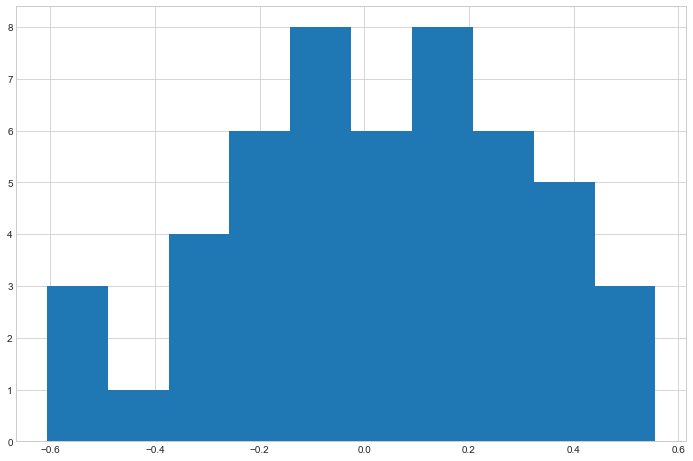

In [25]:
fig = plt.figure(figsize=(12,8)) # create the figure
ax = fig.add_subplot(111) # create a 3d axis in the figure 
ax.hist(Beta_0_OLS)


# Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

The **parameters** and **grids** for $m_1$, $m_2$ and $d$ should be:

In [26]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
r = 0.04
Delta = 0.25

# b. grids
m1_vec = np.linspace(1e-8,10,100)
m2_vec = np.linspace(1e-8,10,100)
d_vec = np.linspace(1e-8,5,100)

In [27]:
# Additionally we received information on the parameter chi, which should be set to 0.9:
chi=0.9

In [28]:
# Defining value function 2 and substituting the constraint into the value function
def v2(c,rho,d,chi,m2,alpha):
    return (c**alpha*(d+chi**(m2-c))**(1-alpha))**(1-rho)/(1-rho)

In [29]:
# Defining end-of-period 1 value function
def w(beta,r,a,y,d,Delta,v2_interp):

    # a. w value if low income
    m2_low = (1+r)*(m1-c1)*a + 1-Delta
    v2_low = v2_interp([m2_low])[0] 

    # b. w value if mid income
    m2_mid = (1+r)*(m1-c1)*a + 1
    v2_mid = v2_interp([m2_mid])[0] 
    
    # c. w value if high income
    m2_high = (1+r)*(m1-c1)*a + 1+Delta
    v2_high = v2_interp([m2_high])[0] 

    # d. expected w value
    w = ((1/3)*v2_low + (1/3)*v2_mid + (1/3)*v2_high)*beta

    return w(a,d)
## Lidt i tvivl om hvor der skal bruges w, v1, eller utility. Se afsnit 5 her: 
##https://numeconcopenhagen.netlify.app/lectures/Numerical_optimization

**Question 1:** Find and plot the functions $v_{2}(m_{2},d)$, $c^{\ast}(m_2,d)$, and $x^{\ast}(m_2,d)$. Comment.

In [30]:
def solve_period_2(rho, alpha, beta, r, Delta):

    # a. grids
    m2_vec = np.linspace(1e-8,10,100)
    d_vec = np.linspace(1e-8,5,100)
    c_vec = np.empty(100)
    v2_vec = np.empty(100)
    x_vec = np.empty(100)


    # b. solve for each m2 in grid
    for i,m2 in enumerate(m2_vec):

        # i. objective
        obj = lambda c2: -v2(c_vec,rho,d_vec,chi,m2,alpha)

        # ii. initial value (consume half)
        x0 = m2/2

        # iii. optimizer
        result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

        # iv. save
        v2_vec[i] = -result.fun
        d_vec[i] = result.x
        
    return m2_vec,c_vec,v2_vec,x_vec

# solve
m1_vec,m2_vec,d_vec = solve_period_2(rho, alpha, beta, r, Delta)

# illustration
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(m2_vec,d_vec)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d_2$')
ax.set_title('consumption function in period 2')

ax = fig.add_subplot(1,2,2)
ax.plot(m2_vec,m1_vec)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$m_1$')
ax.set_title('value function in period 2')
ax.set_ylim([-40,1]);

ValueError: setting an array element with a sequence.

**Question 2:** Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.

**Hint:** For interpolation of $v_2(m_2,d)$ consider using `interpolate.RegularGridInterpolator([GRID-VECTOR1,GRID-VECTOR2],VALUE-MATRIX,bounds_error=False,fill_value=None)`.

Next, consider an **extension** of the model, where there is also a **period 0**. In this period, the household makes a choice whether to stick with the level of durables it has, $z = 0$, or adjust its stock of durables, $z = 1$. If adjusting, the household loses a part of the value of its durable stock; more specificaly it incurs a proportional loss of $\Lambda \in (0,1)$.

Mathematically, the **household problem in period 0** is:

$$
\begin{aligned}
v_{0}(m_{0},d_{0}) &= \max_{z\in\{0,1\}} \begin{cases}
w(m_{0},d_{0}) & \text{if } z = 0\\
v_1(m_0+(1-\Lambda) d_{0}) & \text{if } z = 1\\
\end{cases}\\
\end{aligned}
$$

The **parameters** and **grids** for $m_0$ and $d_0$ should be:

In [31]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

**Question 3:** For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

# Gradient descent

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

**Question:** Implement the algorithm above such that the code below can run.

**Optimizer function:**

In [32]:
def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):
    pass

**Test case:**

In [33]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

not implemented yet
